In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [2]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 6.]
SEED = 42

In [3]:
df = pd.read_csv("data/2008_test.csv", sep=",")
print(df.shape)
df.head()

(70000, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
""" 
не совпадающие имена столбцов с именами на сайте:
'UniqueCarrier' -> Reporting_Airline
'FlightNum' -> Flight_Number_Reporting_Airline
'TailNum' -> Tail_Number
"""

" \nне совпадающие имена столбцов с именами на сайте:\n'UniqueCarrier' -> Reporting_Airline\n'FlightNum' -> Flight_Number_Reporting_Airline\n'TailNum' -> Tail_Number\n"

### Наш датасет:

In [6]:
df = pd.read_csv("data/2016_01.csv", sep=",")
print(df.shape)
df.head()

(434354, 29)


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2016,1,5,2,AA,N3EKAA,238,MIA,DCA,1415,...,0.0,150.0,144.0,126.0,919.0,15.0,0.0,0.0,0.0,0.0
1,2016,1,6,3,AA,N3KUAA,238,MIA,DCA,1415,...,0.0,150.0,148.0,128.0,919.0,NaN,NaN,NaN,NaN,NaN
2,2016,1,7,4,AA,N3AVAA,238,MIA,DCA,1415,...,0.0,150.0,148.0,123.0,919.0,18.0,0.0,0.0,0.0,6.0
3,2016,1,8,5,AA,N3DSAA,238,MIA,DCA,1415,...,0.0,150.0,171.0,116.0,919.0,0.0,0.0,52.0,0.0,0.0
4,2016,1,9,6,AA,N3DFAA,238,MIA,DCA,1415,...,0.0,150.0,158.0,121.0,919.0,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                    0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
TAXI_OUT                  127
TAXI_IN                   434
CRS_ARR_TIME                0
ARR_TIME                  434
ARR_DELAY                1056
CANCELLED                   0
CANCELLATION_CODE      434162
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME      1056
AIR_TIME                 1056
DISTANCE                    0
CARRIER_DELAY          363472
WEATHER_DELAY          363472
NAS_DELAY              363472
SECURITY_DELAY         363472
LATE_AIRCRAFT_DELAY    363472
dtype: int64

In [8]:
df = df.drop('CANCELLATION_CODE', axis=1)

In [9]:
# cols where null = 0
cols_null_equal_zero = ['CANCELLED', 'CARRIER_DELAY', 'WEATHER_DELAY',
                        'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

In [10]:
df[cols_null_equal_zero] = df[cols_null_equal_zero].fillna(value=0)

In [11]:
df.isna().sum()

YEAR                      0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
OP_UNIQUE_CARRIER         0
TAIL_NUM                  0
OP_CARRIER_FL_NUM         0
ORIGIN                    0
DEST                      0
CRS_DEP_TIME              0
DEP_TIME                  0
DEP_DELAY                 0
TAXI_OUT                127
TAXI_IN                 434
CRS_ARR_TIME              0
ARR_TIME                434
ARR_DELAY              1056
CANCELLED                 0
DIVERTED                  0
CRS_ELAPSED_TIME          0
ACTUAL_ELAPSED_TIME    1056
AIR_TIME               1056
DISTANCE                  0
CARRIER_DELAY             0
WEATHER_DELAY             0
NAS_DELAY                 0
SECURITY_DELAY            0
LATE_AIRCRAFT_DELAY       0
dtype: int64

In [12]:
df['CRS_ET_TO_ACTUAL_ET'] = df['CRS_ELAPSED_TIME'] - df['ACTUAL_ELAPSED_TIME']

In [14]:
df.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_ET_TO_ACTUAL_ET
count,434354.0,434354.0,434354.000000,434354.000000,434354.000000,434354.000000,434354.000000,434354.000000,434227.000000,433920.000000,...,434354.000000,433298.000000,433298.000000,434354.000000,434354.000000,434354.000000,434354.000000,434354.000000,434354.000000,433298.000000
mean,2016.0,1.0,15.759749,4.089208,2078.653815,1330.167251,1334.236268,7.793537,16.449422,7.294298,...,146.375834,140.135200,116.395818,843.891549,3.414236,0.462899,2.069317,0.013123,3.530678,6.222344
std,0.0,0.0,8.963697,2.000856,1757.966244,482.848314,492.955466,36.833007,9.169353,5.437682,...,76.510227,74.753951,72.981191,609.668191,24.305388,9.473377,11.081800,0.837076,18.752981,13.284620
min,2016.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,-47.000000,1.000000,1.000000,...,21.000000,15.000000,8.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000
25%,2016.0,1.0,8.000000,2.000000,701.000000,920.000000,924.000000,-5.000000,11.000000,4.000000,...,90.000000,85.000000,62.000000,391.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,1.0,15.000000,4.000000,1591.000000,1325.000000,1331.000000,-2.000000,14.000000,6.000000,...,128.000000,122.000000,98.000000,679.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,2016.0,1.0,24.000000,6.000000,2764.000000,1730.000000,1737.000000,5.000000,19.000000,8.000000,...,180.000000,173.000000,148.000000,1089.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
max,2016.0,1.0,31.000000,7.000000,7438.000000,2359.000000,2400.000000,1663.000000,158.000000,155.000000,...,705.000000,721.000000,698.000000,4983.000000,1659.000000,1093.000000,755.000000,242.000000,1158.000000,78.000000


<AxesSubplot:>

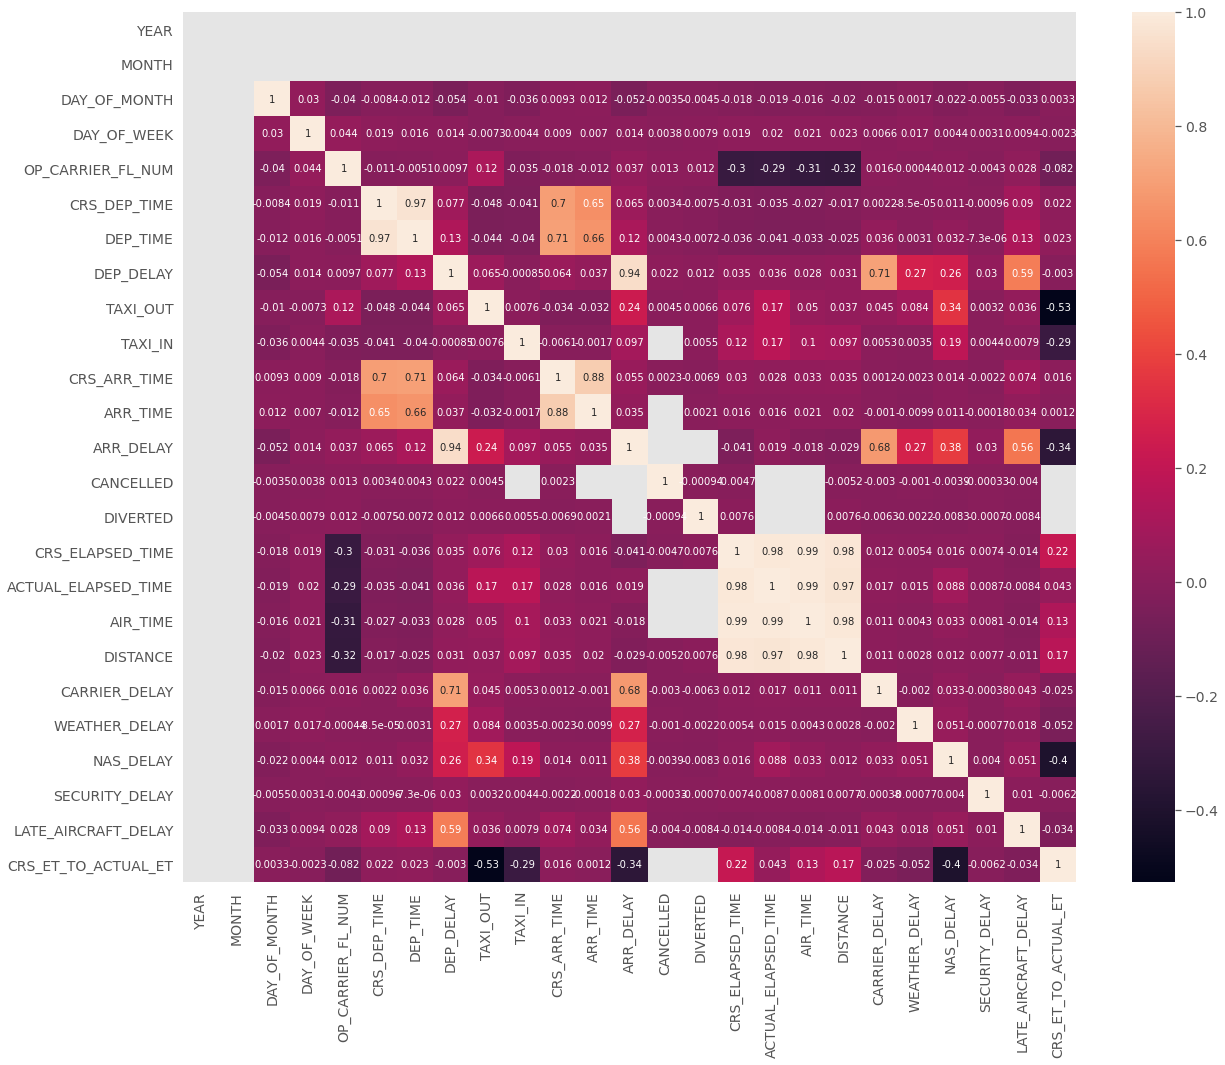

In [15]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='DEP_DELAY', ylabel='Count'>

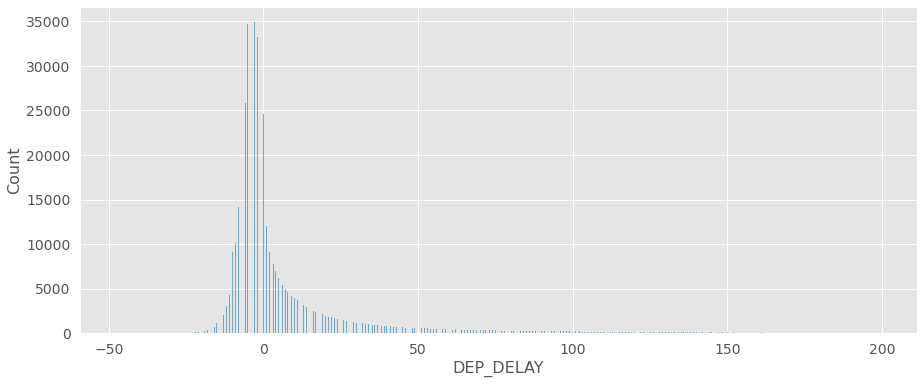

In [20]:
sns.histplot(df.query('DEP_DELAY < 200')['DEP_DELAY'])